In [66]:
import basedosdados as bd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [110]:
Centro_Oeste = ['MS', 'MT', 'GO', 'DF']
Sudeste = ['SP', 'RJ', 'ES']
Norte = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO']
Sul = ['PR', 'RS', 'SC']
Nordeste = ['SE', 'PE', 'PI', 'MA', 'CE', 'RN', 'PB', 'AL', 'BA']
Regioes_br = [Centro_Oeste, Sudeste, Norte, Sul, Nordeste]

Downloading: 100%|██████████| 81/81 [00:00<00:00, 238.33rows/s]


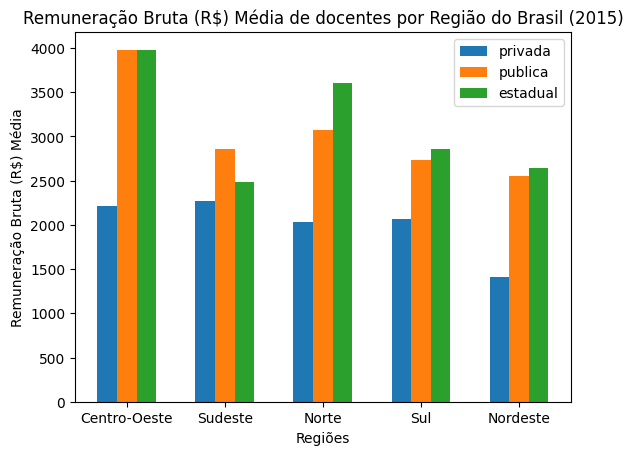

In [115]:
df_uf_rem = bd.read_sql("SELECT sigla_uf,rede,rem_bruta_rais_media \
    FROM `basedosdados.br_inep_indicadores_educacionais.uf_remuneracao_docentes` \
    WHERE ano=2015 and escolaridade='total';",
billing_project_id='45888281253')

bw = .2
Redes = set(df_uf_rem['rede'].values)
r = np.arange(len(Regioes_br))
y = []
for rede in Redes:
    y = []
    r = [i + bw for i in r]
    for reg in Regioes_br:
        y.append(sum(df_uf_rem.loc[df_uf_rem['rede'] == rede].loc[df_uf_rem['sigla_uf'].isin(reg)]['rem_bruta_rais_media'])/len(reg))
    plt.bar(r,y, width=bw, label=rede)

plt.xlabel('Regiões')
plt.ylabel('Remuneração Bruta (R$) Média')
plt.xticks([i + bw+.2 for i in range(len(y))], ['Centro-Oeste', 'Sudeste', 'Norte', 'Sul', 'Nordeste'])
plt.legend()
plt.title('Remuneração Bruta (R$) Média de docentes por Região do Brasil (2015)')
plt.show()


Downloading: 100%|██████████| 162/162 [00:00<00:00, 464.30rows/s]


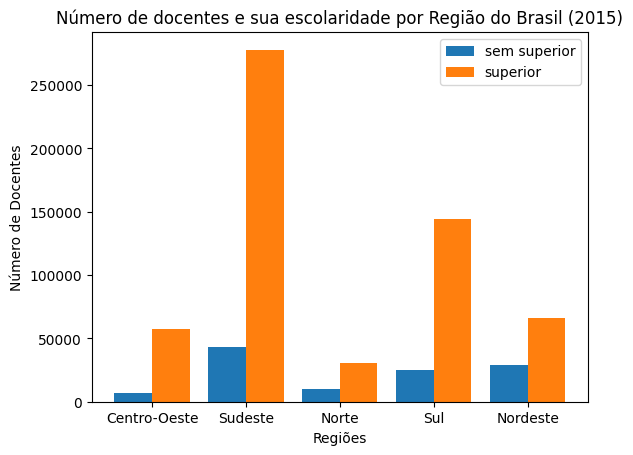

In [129]:
df_uf_rem = bd.read_sql("SELECT sigla_uf,rede,escolaridade,numero_docentes \
    FROM `basedosdados.br_inep_indicadores_educacionais.uf_remuneracao_docentes` \
    WHERE ano=2015 and escolaridade!='total';",
billing_project_id='45888281253')

bw = .4
Escolaridades = set(df_uf_rem['escolaridade'].values)
r = np.arange(len(Regioes_br))
y = []
for escolaridade in Escolaridades:
    y = []
    r = [i + bw for i in r]
    for reg in Regioes_br:
        y.append(sum(df_uf_rem.loc[df_uf_rem['escolaridade'] == escolaridade].loc[df_uf_rem['sigla_uf'].isin(reg)]['numero_docentes'])/len(reg))
    plt.bar(r,y, width=bw, label=escolaridade)

plt.xlabel('Regiões')
plt.ylabel('Número de Docentes')
plt.xticks([i + bw+.2 for i in range(len(y))], ['Centro-Oeste', 'Sudeste', 'Norte', 'Sul', 'Nordeste'])
plt.legend()
plt.title('Número de docentes e sua escolaridade por Região do Brasil (2015)')
plt.show()

Downloading: 100%|██████████| 5/5 [00:00<00:00, 16.19rows/s]


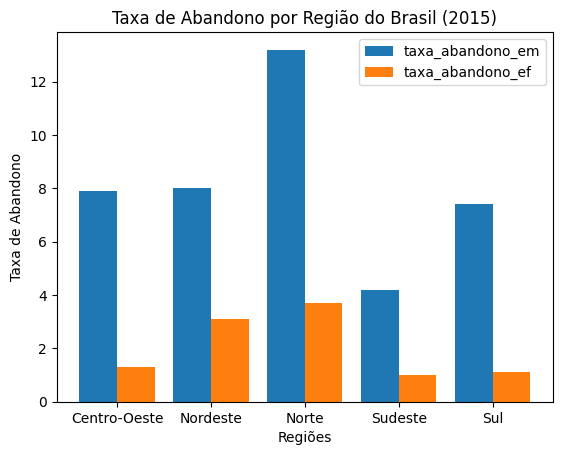

In [137]:
df_taxas_regiao2 = bd.read_sql("SELECT regiao,taxa_abandono_ef,taxa_abandono_em \
    FROM `basedosdados.br_inep_indicadores_educacionais.regiao` \
    WHERE ano=2015 and rede='total' and localizacao='total';",
billing_project_id="45888281253")

bw = .4
abandonos = {'taxa_abandono_ef', 'taxa_abandono_em'}
r = np.arange(len(df_taxas_regiao2['regiao']))
y = []
for aban in abandonos:
    r = [i + bw for i in r]
    y = df_taxas_regiao2[aban]
    plt.bar(r,y, width=bw, label=aban)

plt.xlabel('Regiões')
plt.ylabel('Taxa de Abandono')
plt.xticks([i + bw+.2 for i in range(len(y))], list(df_taxas_regiao2['regiao']))
plt.legend()
plt.title('Taxa de Abandono por Região do Brasil (2015)')
plt.show()

Downloading: 100%|██████████| 5/5 [00:00<00:00, 15.06rows/s]


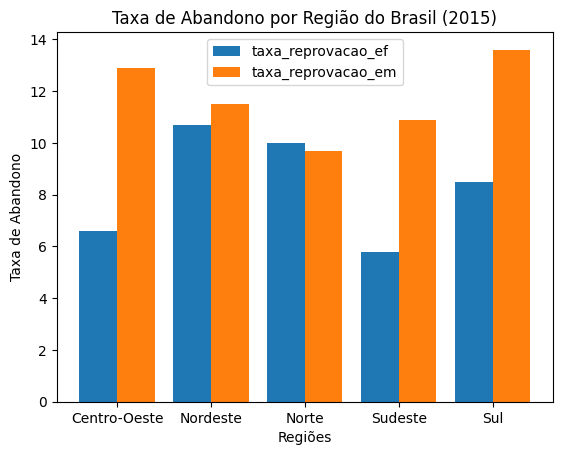

In [142]:
df_taxas_regiao2 = bd.read_sql("SELECT regiao,taxa_reprovacao_ef,taxa_reprovacao_em \
    FROM `basedosdados.br_inep_indicadores_educacionais.regiao` \
    WHERE ano=2015 and rede='total' and localizacao='total';",
billing_project_id="45888281253")

bw = .4
reprovacoes = {'taxa_reprovacao_ef','taxa_reprovacao_em'}
r = np.arange(len(df_taxas_regiao2['regiao']))
y = []
for rep in reprovacoes:
    r = [i + bw for i in r]
    y = df_taxas_regiao2[rep]
    plt.bar(r,y, width=bw, label=rep)

plt.xlabel('Regiões')
plt.ylabel('Taxa de Abandono')
plt.xticks([i + bw+.2 for i in range(len(y))], list(df_taxas_regiao2['regiao']))
plt.legend()
plt.title('Taxa de Abandono por Região do Brasil (2015)')
plt.show()

Downloading: 100%|██████████| 40/40 [00:00<00:00, 112.42rows/s]


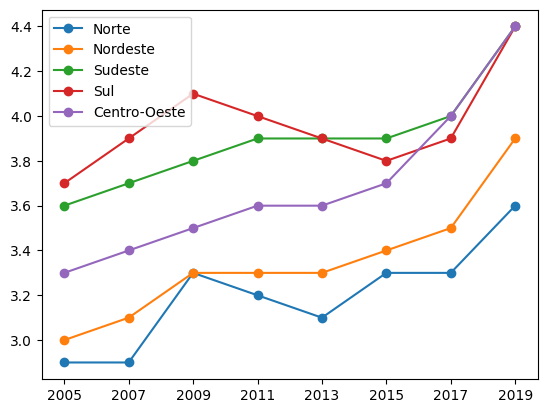

In [192]:
df_ideb = bd.read_sql("SELECT ano,regiao,ideb \
    FROM `basedosdados.br_inep_ideb.regiao` \
    WHERE ano!=2021 and rede='total' and ensino='medio';",
billing_project_id="45888281253")

anos = [i for i in range(2005,2021) if i%2 != 0]
regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
for reg in regioes:
    plt.plot(anos,df_ideb.loc[df_ideb['regiao'] == reg]['ideb'].array,'-o', label = reg)

plt.xticks(anos, anos)
plt.legend()
plt.show()